<a href="https://colab.research.google.com/github/GMartinez02/Big-Data---43C8-Fall-2024/blob/Concepts-as-Code/Homework1_PCA_%26_nSVA_with_Vehicle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A) PCA Baby

1. What’s the idea of PCA? what are its usage? What does a PC mean?
Which data will be good for PCA?
2. Why do we need to do zero-mean before PCA?
3. What does a covariance matrix mean? How to calculate a covariance
matrix?


1. PCA, or Principal Component Analysis, is a technique that preserves data variance by projecting data to a low-dimensional space using PCs, or principal components. These components are linear combinations of original features and are orthogonal to each other. PCA is commonly used for dimensionality reduction, outlier detection, and feature extraction. It's important to note that standardized linear data is particularly suitable for PCA, as it can significantly impact the results.
2. Zero-mean data is needed before PCA because it assumes linearity in the relationships between variables and that the largest variance represents the most important latent structures in the data.
3. In the context of PCA, a covariance matrix provides an estimate of individual variables of individual variables while also measuring if they are correlated. One can calculate a covariance matrix by multiplying the transpose of the zero mean data by the zero mean data and dividing the product by n -1, where n is the number of observations.

# B) PCA Applications

### Mounting Colab and Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
curent_folder='Big Data - 43C8/Homework Code/Homework1'
dest_folder='/content/drive/My Drive/'+curent_folder
os.chdir(dest_folder)
print('Path:',  os.getcwd())

Mounted at /content/drive
Path: /content/drive/My Drive/Big Data - 43C8/Homework Code/Homework1


### Importing "vehicles.csv"

In [3]:
data = pd.read_csv('vehicles.csv')
n,m = data.shape
print(n)
print(m)
data = data.iloc[:, 7:m]
col_names = list(data.columns)
print(data.shape)
data.head()

387
18
(387, 11)


,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,23820,21761,2.0,4,200,24,31,2778,101,172,68


In [4]:
data.index

Index(['Acura 3.5 RL', 'Acura 3.5 RL Navigation', 'Acura MDX', 'Acura NSX S',
       'Acura RSX', 'Acura TL', 'Acura TSX', 'Audi A4 1.8T',
       'Audi A4 1.8T convertible', 'Audi A4 3.0 convertible',
       ...
       'Volvo S40', 'Volvo S60 2.5', 'Volvo S60 T5', 'Volvo S60 R',
       'Volvo S80 2.5T', 'Volvo S80 2.9', 'Volvo S80 T6', 'Volvo V40',
       'Volvo XC70', 'Volvo XC90 T6'],
      dtype='object', length=387)

###PCA Function


In [5]:
def doPCA (data, normalizaion_bit, PCA_info):
  if normalizaion_bit==1:
    normalized_data=MinMaxScaler().fit_transform(data)
  elif normalizaion_bit==2:
    normalized_data=StandardScaler().fit_transform(data) #best one because vehicle data is linear
  elif normalizaion_bit==3:
    normalized_data=RobustScaler().fit_transform(data)
  elif normalizaion_bit==4:
    normalized_data=MaxAbsScaler().fit_transform(data)
  elif normalizaion_bit==5:
    normalized_data=PowerTransformer(method='yeo-johnson').fit_transform(normalized_data)
  else:
    normalized_data=data

  pca = PCA(n_components=2)
  newData = pca.fit_transform(normalized_data)

  if PCA_info == 1:
    detail = pca.explained_variance_
  if PCA_info == 2:
    detail = pca.explained_variance_ratio_
  if PCA_info == 3:
    detail = pca.components_

  return newData, detail

###Biplot Function

In [54]:
def PCA_biplot (normalized_PC_object, componants):

  PC1=normalized_PC_object[:, 0]
  PC2=normalized_PC_object[:, 1]

  scale = 10

  PC1 = PC1 * scale
  PC2 = PC2 * scale

  fig, ax = plt.subplots()

  for i, variables in enumerate(col_names):
      ax.arrow(0,0,
              componants[0,i] * 20, componants[1,i] * 20,
              head_length = 0.2,
              head_width = 0.2,
              color = "orange",
              alpha = 0.5)
      ax.text(componants[0,i] * 20 +0.1,
              componants[1,i] * 20 +0.1,
              variables,
              color = "orange",
              fontsize = 10)

  ax.scatter(PC1, PC2, s = 8)

  #Outlier detection code from Han
  #

  #Labels all the points
  #for i, variables in enumerate(data.index):
  #       ax.text(PC1[i],
  #        PC2[i],
  #        str(variables),
  #        fontsize = 10).set_alpha(.5)

  ax.set_xlabel('PC1', fontsize = 20)
  ax.set_ylabel('PC2', fontsize = 20)
  ax.set_title('Biplot', fontsize = 20)

  return plt.show()

###Five Biplots for Five Normalizations

In [18]:
#Using MinMaxScaler()
min_max_PC, components= doPCA(data, 1, 3)
print(min_max_PC.shape)
print(components)
print(components.shape)

(387, 2)
[[ 0.15349802  0.15390699  0.48055663  0.33963919  0.30709001 -0.18749223
  -0.18320129  0.32484784  0.31209986  0.29825396  0.38929854]
 [ 0.34418533  0.34810724  0.16194175  0.21906786  0.41991667 -0.08403579
  -0.09486112 -0.07650404 -0.43490347 -0.42728401 -0.34086035]]
(2, 11)


In [17]:
#DF with columns as PCs and Vehicles, attemting to get "coordinates" of observations
_, expl_var_rat = doPCA(data, 1, 2)
df = pd.DataFrame(data = min_max_PC,
                  columns = ['PC1', 'PC2'])

target = pd.Series(data.index, name='Vehicle')

result_df = pd.concat([df, target], axis=1)
print(result_df.shape)
result_df.tail()

(387, 3)


,PC1,PC2,Vehicle
382,0.048128,-0.062372,Volvo S80 2.9
383,0.120944,0.030599,Volvo S80 T6
384,-0.442691,0.008669,Volvo V40
385,-0.014840,-0.100774,Volvo XC70
386,0.307499,-0.070592,Volvo XC90 T6


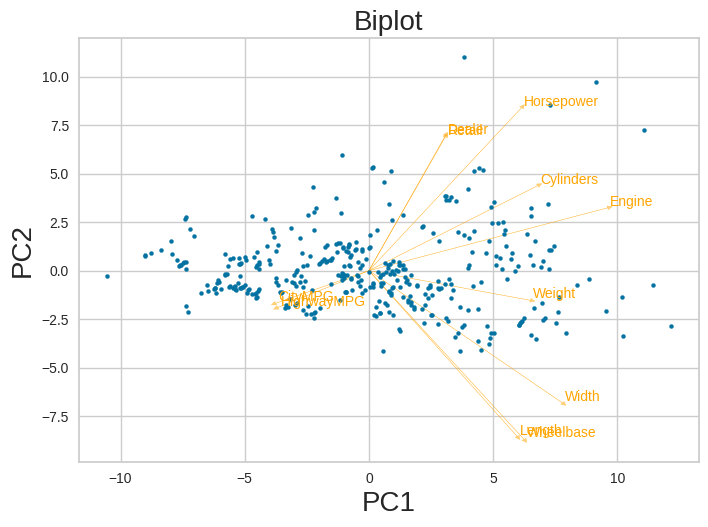

In [46]:
#MinMax Bipot
min_max_PC, components= doPCA(data, 1, 3)
PCA_biplot(min_max_PC, components)

In [53]:
#Standard Scaler Biplot
std_scaler_PC, components= doPCA(data, 2, 3)
PCA_biplot(std_scaler_PC, components)

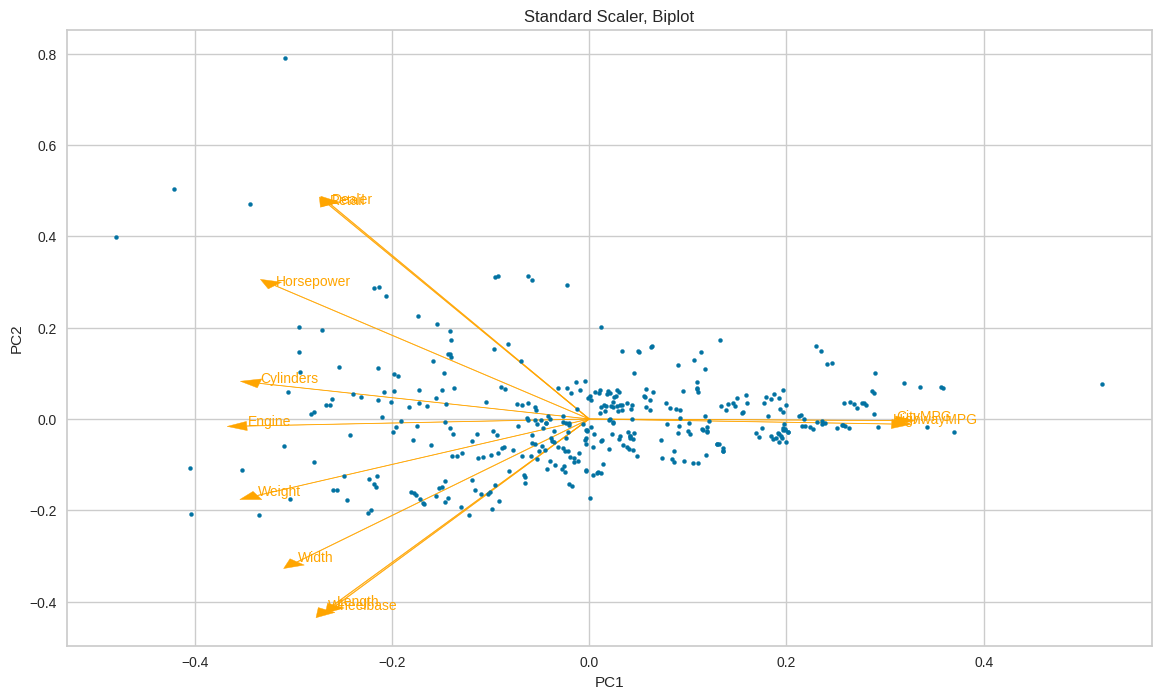

In [50]:
#Data for Bipot
std_scaler_PC, loadings= doPCA(data, 2, 3)
PC1=std_scaler_PC[:, 0]
PC2=std_scaler_PC[:, 1]

scalePC1  = 1/(PC1.max() - PC1.min())
scalePC2  = 1/(PC2.max() - PC2.min())

PC1 = PC1 * scalePC1
PC2 = PC2 * scalePC2

fig, ax = plt.subplots(figsize = (14,8))

for i, variables in enumerate(col_names):
    ax.arrow(0,0,
            loadings[0,i],loadings[1,i],
            head_length = 0.02,
            head_width = 0.02,
            color = "orange")
    ax.text(loadings[0,i] + 0.001,loadings[1,i] + 0.001,
            variables,
            color = "orange",
            fontsize = 10)

ax.scatter(PC1, PC2, s = 8)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Standard Scaler, Biplot')
plt.show()

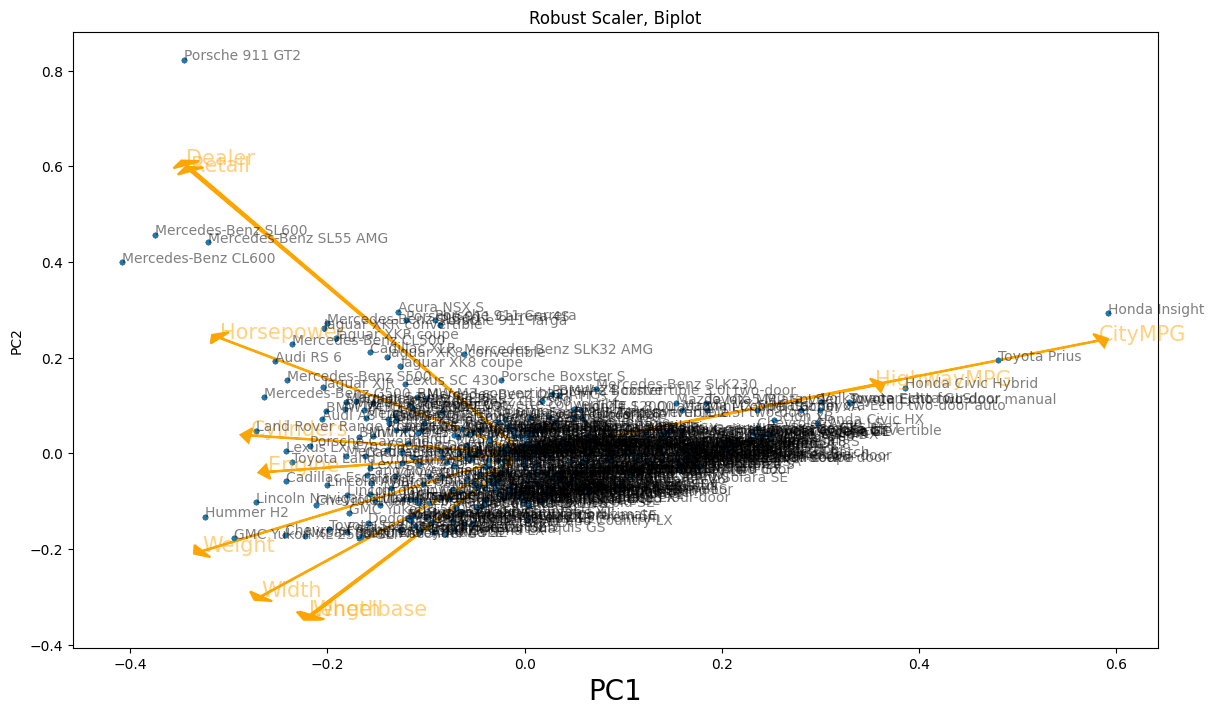

In [12]:
#Data for Bipot
#GOLDEN BOY
robust_PC, loadings= doPCA(data, 3, 3)
PC1=robust_PC[:, 0]
PC2=robust_PC[:, 1]

scalePC1  = 1/(PC1.max() - PC1.min())
scalePC2  = 1/(PC2.max() - PC2.min())

PC1 = PC1 * scalePC1
PC2 = PC2 * scalePC2

fig, ax = plt.subplots(figsize = (14,8))

for i, variables in enumerate(col_names):
    ax.arrow(0,0,
            loadings[0,i] * 1.1,loadings[1,i] * 1.1,
            head_length = 0.01,
            head_width = 0.03,
            color = "orange",
            linewidth = 1.5 )
    ax.text(loadings[0,i] * 1.1,loadings[1,i] * 1.1,
            variables,
            color = "orange",
            fontsize = 15).set_alpha(.5)
    ax.scatter(PC1, PC2, s = 8, cmap = "viridis")


for i, variables in enumerate(data.index):
  ax.text(PC1[i],
          PC2[i],
          str(variables),
          fontsize = 10).set_alpha(.5)


ax.set_xlabel('PC1', fontsize = 20)
ax.set_ylabel('PC2')
ax.set_title('Robust Scaler, Biplot')
plt.show()

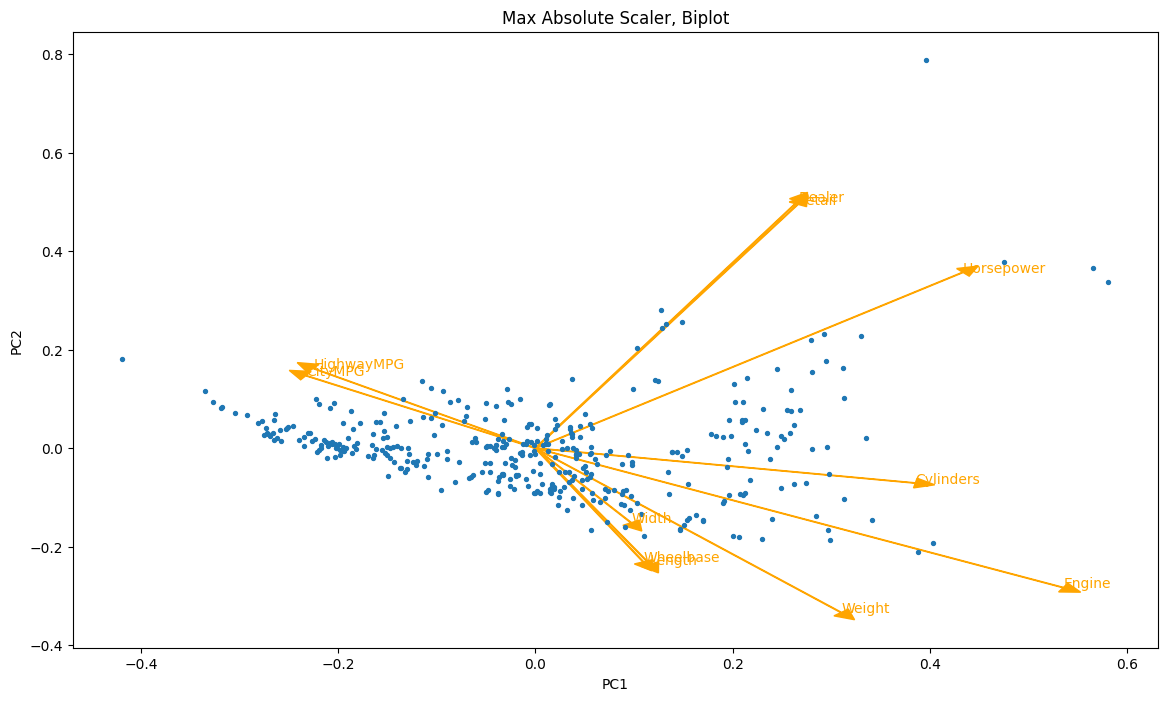

In [13]:
#Data for Bipot
max_abs_PC, loadings= doPCA(data, 4, 3)
PC1=max_abs_PC[:, 0]
PC2=max_abs_PC[:, 1]

scalePC1  = 1/(PC1.max() - PC1.min())
scalePC2  = 1/(PC2.max() - PC2.min())

PC1 = PC1 * scalePC1
PC2 = PC2 * scalePC2

fig, ax = plt.subplots(figsize = (14,8))

for i, variables in enumerate(col_names):
    ax.arrow(0,0,
            loadings[0,i],loadings[1,i],
            head_length = 0.02,
            head_width = 0.02,
            color = "orange")
    ax.text(loadings[0,i], loadings[1,i],
            variables,
            color = "orange",
            fontsize = 10)

ax.scatter(PC1, PC2, s = 8)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Max Absolute Scaler, Biplot')
plt.show()

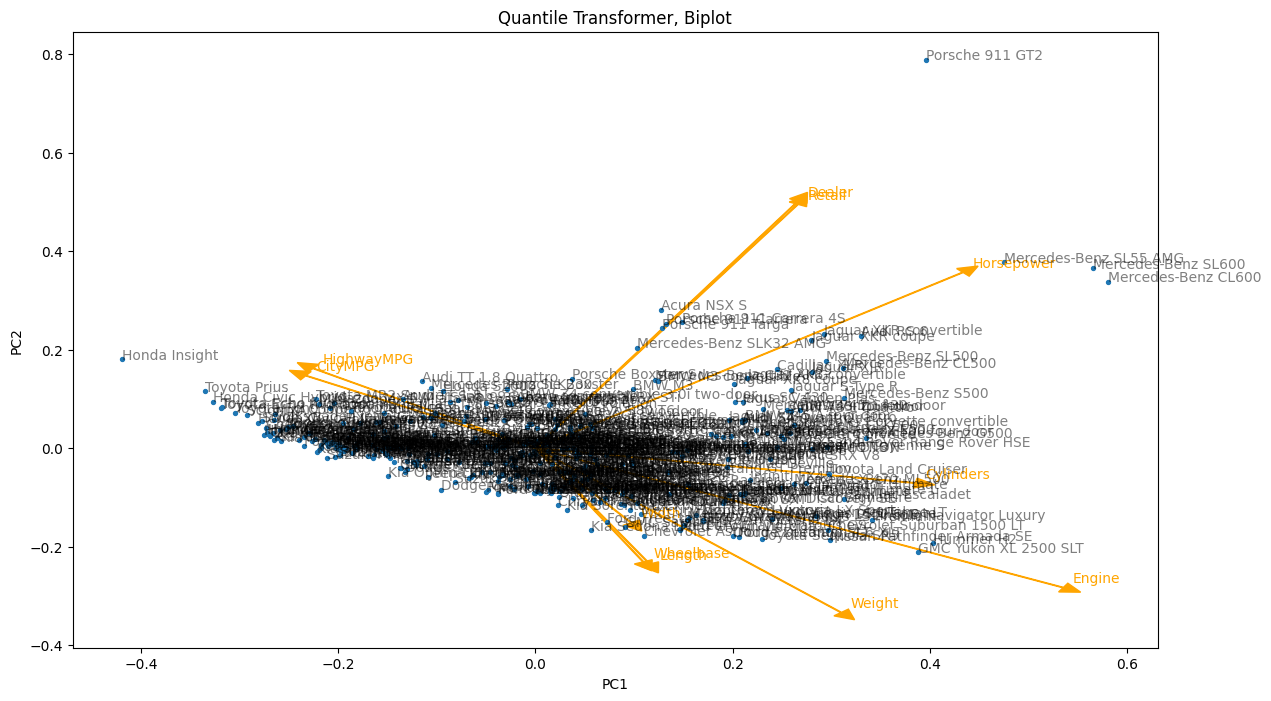

In [14]:
#Data for Bipot
quantile_tf_PC, loadings= doPCA(data, 4, 3)
PC1=quantile_tf_PC[:, 0]
PC2=quantile_tf_PC[:, 1]

scalePC1  = 1/(PC1.max() - PC1.min())
scalePC2  = 1/(PC2.max() - PC2.min())

PC1 = PC1 * scalePC1
PC2 = PC2 * scalePC2

fig, ax = plt.subplots(figsize = (14,8))

for i, variables in enumerate(col_names):
    ax.arrow(0,0,
            loadings[0,i],loadings[1,i],
            head_length = 0.02,
            head_width = 0.02,
            color = "orange")
    ax.text(loadings[0,i] + 0.01,loadings[1,i] + 0.01,
            variables,
            color = "orange",
            fontsize = 10)
for i, variables in enumerate(data.index):
          ax.text(PC1[i],
          PC2[i],
          str(variables),
          fontsize = 10).set_alpha(.5)


ax.scatter(PC1, PC2, s = 8)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Quantile Transformer, Biplot')
plt.show()

### Kmeans and Hierarchical Clustering

In [15]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer


In [16]:
df = data.reset_index()
df.drop("level_0", axis = 1, inplace = True)
X = df.drop('index', axis=1)
y = df['index']

KeyError: "['level_0'] not found in axis"

In [ ]:
#Silhouette Score
fig, ax = plt.subplots(2, 2, figsize=(10,10))
for i in [2, 3, 4, 5]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [ ]:
#Elbow Method
km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(X)

In [ ]:
clusters = 15
this_cluster = 1
data_label = KMeans(n_clusters=clusters, random_state=40).fit_predict(data)
min_number = data.shape[0]

for i in range(clusters):
  t = np.sum(data_label == i)
  if t < min_number:
    min_number = t
    this_cluster = i

print("the smallest cluster has " + str(np.sum(data_label == this_cluster)) + " vehicles")
print(data[data_label==this_cluster])

In [ ]:
dim = 2
new_data_2
#pca is very mature and robust

#C) PCA extensions

### Performing PCA for **A** and comparing results:

In [ ]:
A=np.array([
[1, 2, 0],
[7.2, 5, 9],
[-3, 100, 5.8],
[1, -90, 9.7],
[2, 88, 1.2]
])

raw_data, raw_expl_var_ratios = doPCA(A, 6, 3)
standardized_data, std_expl_var_ratios = doPCA(A, 2, 3)
min_max_data, min_max_expl_var_ratios = doPCA(A, 1, 3)
max_abs_data, max_abs_expl_var_ratios = doPCA(A, 4, 3)
robust_data, robust_expl_var_ratios = doPCA(A, 3, 3)

In [ ]:
n,p = A.shape
print(n)

In [ ]:
results = pd.DataFrame({
    'Method': ['Raw', 'Standardized', 'Min-Max', 'Max-Abs', 'Robust'],
    'Explained Variance Ratios': [raw_expl_var_ratios, std_expl_var_ratios, min_max_expl_var_ratios, max_abs_expl_var_ratios, robust_expl_var_ratios]
})

results.head()

In [ ]:
def get_variance_captured(expl_var_ratios):
  return np.sum(expl_var_ratios[:2])

variance_captured = results['Explained Variance Ratios'].apply(get_variance_captured)
max_variance_index = np.argmax(variance_captured)
best_method = results['Method'][max_variance_index]

print(f"The method that captures the most variance in the first two principal components is: {best_method}")


### Calculating the zero mean data of **A** and the PCs for the given matrices:

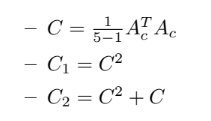

In [ ]:
def zero_mean(X):
  n,p = X.shape
  X_mean = np.mean(X,axis=0)
  X_zero_mean_mat = X - X_mean #output 1

  return X_zero_mean_mat

In [ ]:
def finding_PCs (X_zero_mean_data):
  n,p = X_zero_mean_data.shape
  C = np.dot(X_zero_mean_data.T,X_zero_mean_data)/(n-1)
  Variance, PCs = np.linalg.eigh(C)
  idx = np.argsort(-Variance)
  PCs = PCs[:,idx]

  return PCs

In [ ]:
C = (1/ (5-1)) * np.dot(zero_mean(A).T, zero_mean(A))
C_1 = np.dot(C,C)
C_2 = np.add(C_1, C)

In [ ]:
print(finding_PCs(C), "\n")
print(finding_PCs(C_1), "\n")
print(finding_PCs(C_2))

In [ ]:
c_squared = C*C
finding_PCs(c_squared)